<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/max_pred/candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
#!pip install gplearn

In [226]:
#!pip install causalml

In [227]:
import pandas as pd
import numpy as np

import causalml

In [228]:
#!pip show causalml

In [ ]:
rare_flag           = False


error_cutoff        = True
candy_pred_error_cuttoff_quantile_cutoff_threshold = 0.5



In [229]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [230]:
if rare_flag :
  #rare_cols  = ["peanutyalmondy" , "nougat" , "bar" , "hard" , "caramel" , 'crispedricewafer']
  rare_cols  = [ "peanutyalmondy" ]
  data ["rare"] = 0
  for r in rare_cols : data ["rare"] = data ["rare"] + data [r]
  data ["rare"] = np.where (data ["rare"] >= 1 , 1 , 0)
else:
  rare_cols  = []

In [231]:
data ["peanutyalmondy"].value_counts()

0    71
1    14
Name: peanutyalmondy, dtype: int64

array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>,
        <Axes: title={'center': 'peanutyalmondy'}>],
       [<Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>,
        <Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>],
       [<Axes: title={'center': 'pluribus'}>,
        <Axes: title={'center': 'sugarpercent'}>,
        <Axes: title={'center': 'pricepercent'}>,
        <Axes: title={'center': 'winpercent'}>],
       [<Axes: title={'center': 'rare'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

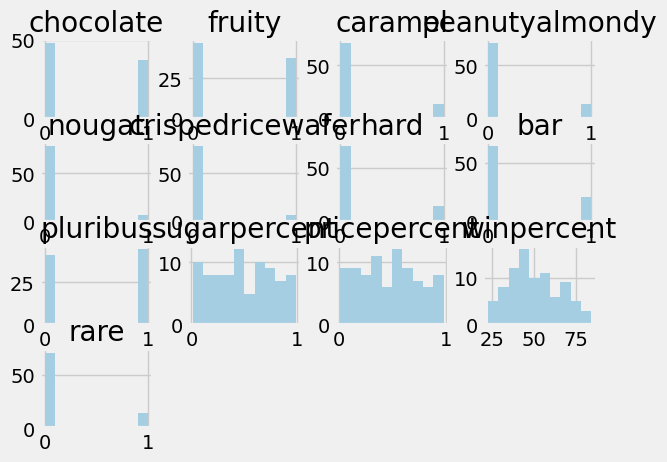

In [232]:
data.hist()

array([[<Axes: title={'center': 'winpercent'}>,
        <Axes: title={'center': 'sugarpercent'}>],
       [<Axes: title={'center': 'pricepercent'}>, <Axes: >]], dtype=object)

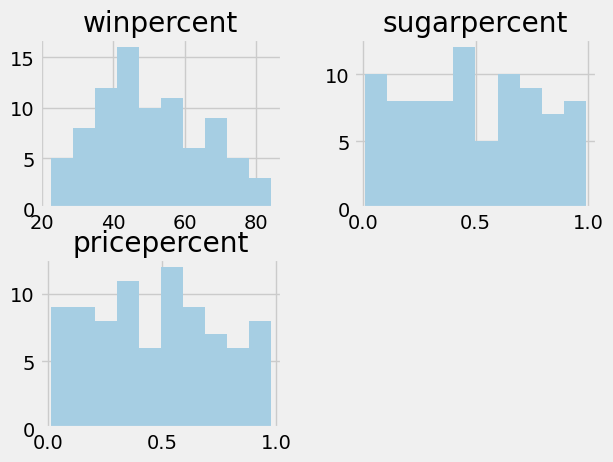

In [233]:
data[["winpercent" , "sugarpercent" , "pricepercent"]].hist()

In [234]:
#data ["sugarpercent"] = data ["sugarpercent"] * 100
#data ["pricepercent"] = data ["pricepercent"] * 100

In [235]:
y_col            = "winpercent"
non_feature_cols = ["competitorname",
                    "pricepercent" ,
                    "sugarpercent" ,
                    "fruity",
                    y_col
                    ]
non_feature_cols = ["competitorname",
                   "pricepercent" ,
                    "sugarpercent" ,

                    y_col
                    ]
for r in rare_cols :      non_feature_cols.append (r)
X                = data.drop (non_feature_cols,axis =1)
X

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,rare
0,1,0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0
81,0,1,0,0,0,1,0,0,0
82,0,1,0,0,0,0,0,1,0
83,0,0,1,0,0,1,0,0,0


In [236]:
X.corr ()

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,rare
chocolate,1.000000,-0.741721,0.249875,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.377824
fruity,-0.741721,1.000000,-0.335485,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.399280
caramel,0.249875,-0.335485,1.000000,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.059356
nougat,0.254892,-0.269367,0.328493,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.213113
crispedricewafer,0.341210,-0.269367,0.213113,-0.089744,1.000000,-0.138675,0.423751,-0.224693,-0.017646
hard,-0.344177,0.390678,-0.122355,-0.138675,-0.138675,1.000000,-0.265165,0.014532,-0.205557
bar,0.597421,-0.515066,0.333960,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.260420
pluribus,-0.339675,0.299725,-0.269585,-0.310339,-0.224693,0.014532,-0.593409,1.000000,-0.206109
rare,0.377824,-0.399280,0.059356,0.213113,-0.017646,-0.205557,0.260420,-0.206109,1.000000


array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>],
       [<Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>,
        <Axes: title={'center': 'hard'}>],
       [<Axes: title={'center': 'bar'}>,
        <Axes: title={'center': 'pluribus'}>,
        <Axes: title={'center': 'rare'}>]], dtype=object)

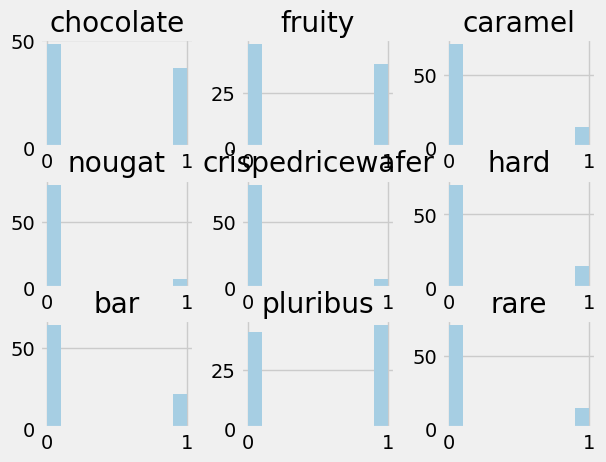

In [237]:
X.hist ()

In [238]:
y = data [y_col]
y

0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

<Axes: >

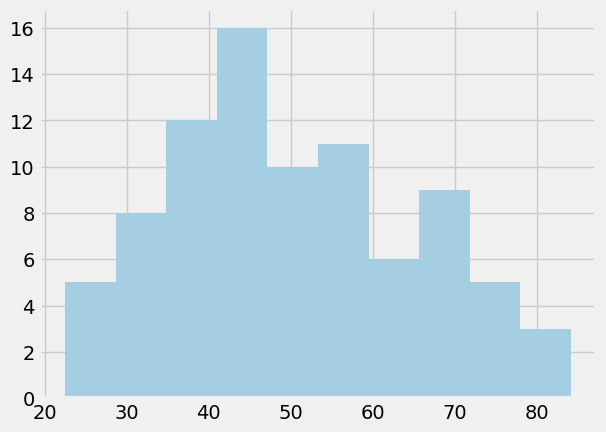

In [239]:
y.hist()

In [240]:
X.join (y).to_csv ("ATE_pp.csv")

In [241]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 10), #20
    "min_samples_split": randint(2, 100), #11
    "min_samples_leaf": randint(1, 100) #11
}


# Setup the Randomized Search with cross-validation for the entire dataset
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs = -1 , verbose = 40)

# Perform the search on the entire dataset
random_search.fit(X, y)
best_params = random_search.best_params_


y_pred = random_search.predict (X)

# Calculate R^2 and RMSE
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Prediction R^2: 0.6425379938584515, RMSE: 8.745535867278724


In [242]:
best_params

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

In [243]:
candy_pred                      = X.join (y).join (pd.DataFrame (y_pred,columns = ["y_pred"]))
candy_pred ["error"]            = candy_pred [y_col] - candy_pred ["y_pred"]
candy_pred ["abs_error"]        = abs (candy_pred [y_col] - candy_pred ["y_pred"])
candy_pred ["error_squared"]    = candy_pred ["error"] ** 2
candy_pred

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,rare,winpercent,y_pred,error,abs_error,error_squared
0,1,0,1,0,1,0,1,0,0,66.971725,68.868745,-1.897020,1.897020,3.598684
1,1,0,0,1,0,0,1,0,0,67.602936,54.564287,13.038649,13.038649,170.006360
2,0,0,0,0,0,0,0,0,0,32.261086,38.595353,-6.334267,6.334267,40.122942
3,0,0,0,0,0,0,0,0,0,46.116505,38.595353,7.521152,7.521152,56.567724
4,0,1,0,0,0,0,0,0,0,52.341465,42.511343,9.830122,9.830122,96.631305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,45.466282,42.511343,2.954939,2.954939,8.731666
81,0,1,0,0,0,1,0,0,0,39.011898,38.731400,0.280498,0.280498,0.078679
82,0,1,0,0,0,0,0,1,0,44.375519,46.707907,-2.332388,2.332388,5.440031
83,0,0,1,0,0,1,0,0,0,41.904308,38.214542,3.689766,3.689766,13.614371


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='winpercent', ylabel='y_pred'>

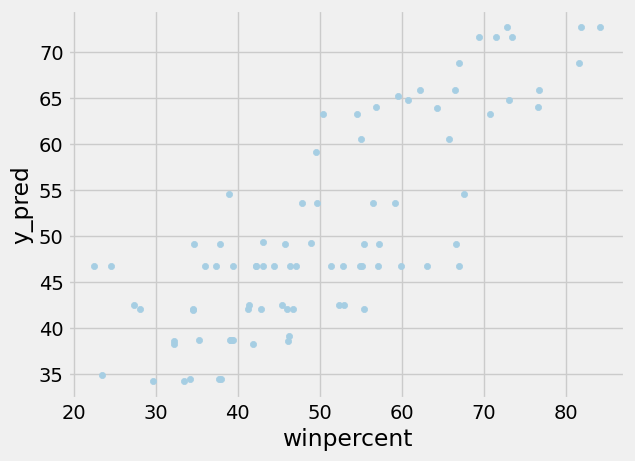

In [244]:
candy_pred.plot.scatter (y_col,"y_pred")

<Axes: xlabel='winpercent', ylabel='error_squared'>

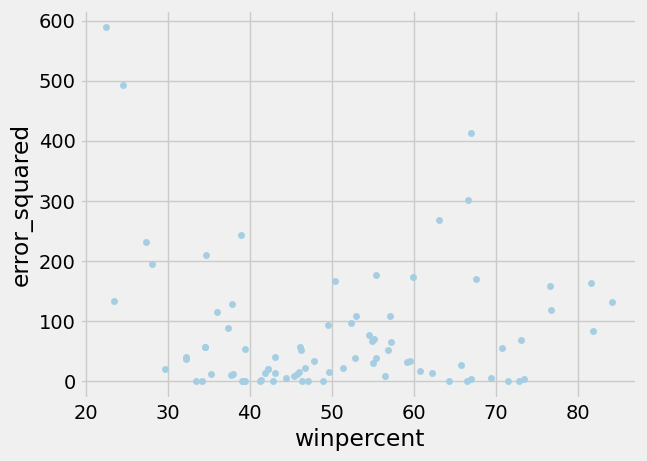

In [254]:
candy_pred.plot.scatter (y_col,"error_squared")

<Axes: >

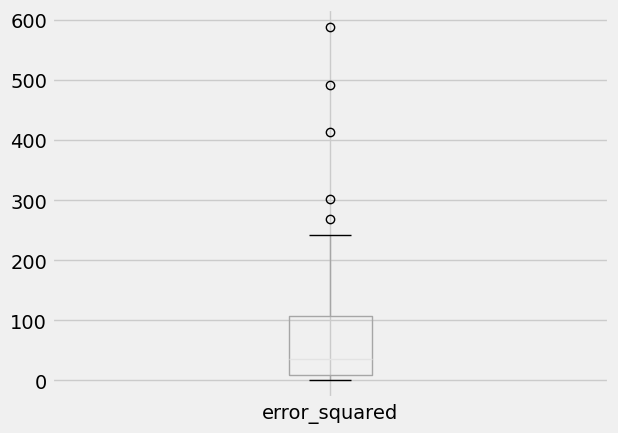

In [258]:
candy_pred [['error_squared',]].boxplot ()

In [260]:
candy_pred ['error_squared'].quantile (0.5)

35.804294726613854

In [272]:

error_cut_off_index = candy_pred.index
if error_cutoff :

  candy_pred_error_cuttoff_quantile_cutoff_threshold_value = candy_pred ['error_squared'].quantile (candy_pred_error_cuttoff_quantile_cutoff_threshold)
  candy_pred_error_cuttoff_condition =  candy_pred ["error_squared"] <= candy_pred_error_cuttoff_quantile_cutoff_threshold_value
  print (candy_pred [candy_pred_error_cuttoff_condition].shape)

  error_cut_off_index = candy_pred [candy_pred_error_cuttoff_condition].index

(43, 14)


<Axes: >

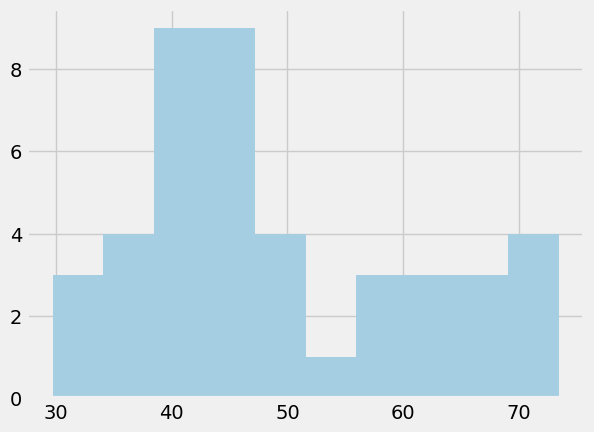

In [271]:
data.loc [error_cut_off_index ] ["winpercent"].hist ()

<Axes: xlabel='winpercent', ylabel='abs_error'>

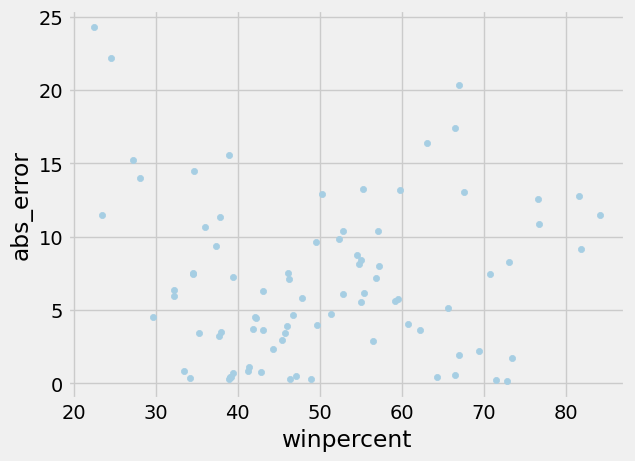

In [255]:
candy_pred.plot.scatter (y_col,"abs_error")

In [247]:
cv_df = pd.DataFrame (random_search.cv_results_)
#cv_df.to_csv ("hyperparams.csv")
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.247832,0.009111,0.009897,0.000289,9,52,94,114,"{'max_depth': 9, 'min_samples_leaf': 52, 'min_...",-0.143387,-0.304516,-0.077362,-0.175088,0.095406,10
1,0.276306,0.019011,0.011192,0.001236,5,72,62,120,"{'max_depth': 5, 'min_samples_leaf': 72, 'min_...",-0.157861,-0.308495,-0.073908,-0.180088,0.097051,19
2,0.373159,0.005710,0.013078,0.000156,9,83,88,174,"{'max_depth': 9, 'min_samples_leaf': 83, 'min_...",-0.155271,-0.327079,-0.071784,-0.184712,0.106282,37
3,0.218599,0.010425,0.010147,0.001273,5,88,25,102,"{'max_depth': 5, 'min_samples_leaf': 88, 'min_...",-0.151163,-0.297815,-0.062353,-0.170444,0.097089,4
4,0.458549,0.098808,0.016436,0.003070,8,53,3,187,"{'max_depth': 8, 'min_samples_leaf': 53, 'min_...",-0.157528,-0.311380,-0.072938,-0.180615,0.098703,25
5,0.338725,0.112729,0.015714,0.005690,6,30,39,101,"{'max_depth': 6, 'min_samples_leaf': 30, 'min_...",-0.172037,-0.310916,-0.061834,-0.181596,0.101911,28
6,0.736682,0.061860,0.026986,0.000949,6,21,34,175,"{'max_depth': 6, 'min_samples_leaf': 21, 'min_...",-0.148528,-0.306790,-0.064159,-0.173159,0.100573,6
7,0.546111,0.063275,0.017603,0.006187,4,22,90,148,"{'max_depth': 4, 'min_samples_leaf': 22, 'min_...",-0.168775,-0.311586,-0.070897,-0.183753,0.098830,36
8,0.644586,0.107384,0.025130,0.014419,5,59,43,191,"{'max_depth': 5, 'min_samples_leaf': 59, 'min_...",-0.154214,-0.319318,-0.067795,-0.180443,0.104345,24
9,0.368042,0.015364,0.013171,0.000959,6,80,16,161,"{'max_depth': 6, 'min_samples_leaf': 80, 'min_...",-0.150311,-0.324826,-0.074064,-0.183067,0.104960,35


In [248]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [249]:
param_dist.keys()

dict_keys(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'])

In [277]:
best_params

{'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

In [251]:
from sklearn.linear_model import LinearRegression

hyper_modelparam_features = ["param_" + p for p in  list (param_dist.keys())]
print (hyper_modelparam_features)
hyper_X                   = cv_df [hyper_modelparam_features]
hyper_y_name              = "rank_test_score"
hyper_y                   = cv_df [hyper_y_name ]

hyper_model               = LinearRegression ()
hyper_model.fit (hyper_X,hyper_y)

print ("hyper_model.score (hyper_X,hyper_y)", hyper_model.score (hyper_X,hyper_y))

hyper_y_pred             = hyper_model.predict (hyper_X)
hyper_df                 = (hyper_X.join (hyper_y)).join (pd.DataFrame (hyper_y_pred,columns = ["hyper_y_pred"]))
hyper_df.sort_values ("rank_test_score")

['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
hyper_model.score (hyper_X,hyper_y) 0.14532424503551367


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,rank_test_score,hyper_y_pred
19,153,6,7,2,1,13.552057
47,127,3,29,6,2,19.116767
43,142,7,16,23,3,17.088908
3,102,5,25,88,4,27.313212
36,198,5,66,35,5,26.304218
6,175,6,34,21,6,19.615404
13,103,3,19,39,7,21.646467
39,178,9,10,27,8,15.215371
40,176,9,43,90,9,27.567995
0,114,9,94,52,10,32.203239


<Axes: xlabel='rank_test_score', ylabel='hyper_y_pred'>

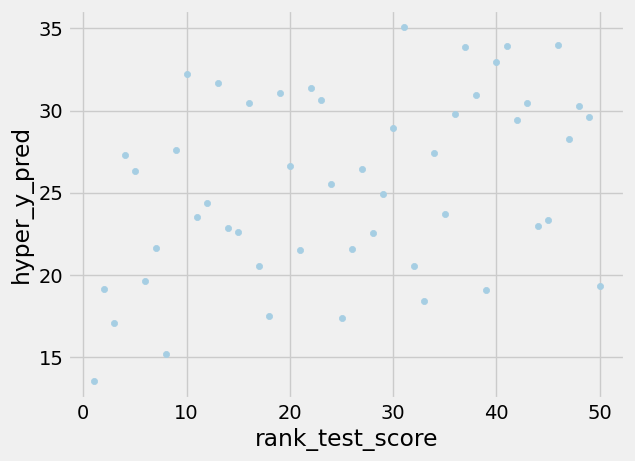

In [253]:
hyper_df.plot.scatter (hyper_y_name , "hyper_y_pred")

In [82]:
hyper_model.feature_names_in_

array(['param_n_estimators', 'param_max_depth', 'param_min_samples_split',
       'param_min_samples_leaf'], dtype=object)

In [83]:
#negative is better : rank
for  p,c in zip ( hyper_model.feature_names_in_ , hyper_model.coef_):print (p,c)

#param_min_samples_leaf -4.9405210916852935  , increase  param_min_samples_leaf
#param_min_samples_split -2.3606866063768948 , increase  param_min_samples_split

param_n_estimators -0.2712407163093835
param_max_depth 4.1966809568721555
param_min_samples_split -2.3606866063768948
param_min_samples_leaf 2.8122749953883477


In [50]:
from sklearn.linear_model import LinearRegression

hyper_modelparam_features = ["param_" + p for p in  list (param_dist.keys())]
print (hyper_modelparam_features)
hyper_X                   = cv_df [hyper_modelparam_features]
hyper_y_name              = "mean_fit_time"
hyper_y                   = cv_df [hyper_y_name ]

hyper_model               = LinearRegression ()
hyper_model.fit (hyper_X,hyper_y)

print ("hyper_model.score (hyper_X,hyper_y)", hyper_model.score (hyper_X,hyper_y))

hyper_y_pred             = hyper_model.predict (hyper_X)
hyper_df                 = (hyper_X.join (hyper_y)).join (pd.DataFrame (hyper_y_pred,columns = ["hyper_y_pred"]))
hyper_df.sort_values ("mean_fit_time")

['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
hyper_model.score (hyper_X,hyper_y) 0.4290639932842921


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_fit_time,hyper_y_pred
18,100,9,9,9,0.214351,0.272874
51,100,10,3,7,0.214928,0.243084
42,101,19,3,1,0.216317,0.196951
33,105,4,10,10,0.219266,0.298674
27,104,16,2,3,0.220755,0.218790
...,...,...,...,...,...,...
97,185,5,4,10,0.660904,0.497005
30,195,9,5,1,0.683598,0.458050
0,160,9,9,4,0.716463,0.396362
1,186,9,4,10,0.946915,0.497513


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='mean_fit_time', ylabel='hyper_y_pred'>

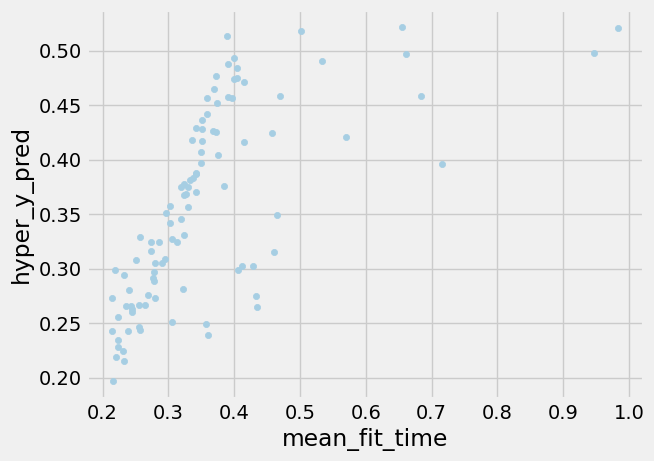

In [51]:
hyper_df.plot.scatter (hyper_y_name , "hyper_y_pred")

In [52]:
for  p,c in zip ( hyper_model.feature_names_in_ , hyper_model.coef_):print (p,c)
#more is worse , more time

param_n_estimators 0.002668429495263233
param_max_depth -0.0005399023837816064
param_min_samples_split 0.0024339368999427686
param_min_samples_leaf 0.007323634674429404


In [307]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning, message='.*SettingWithCopyWarning.*')


In [309]:
#error_cut_off_index
ate_best_params = {'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 153}

outcome_var = y_col
outcome_var2 = "pricepercent"
outcome_var3 = "sugarpercent"


<Axes: >

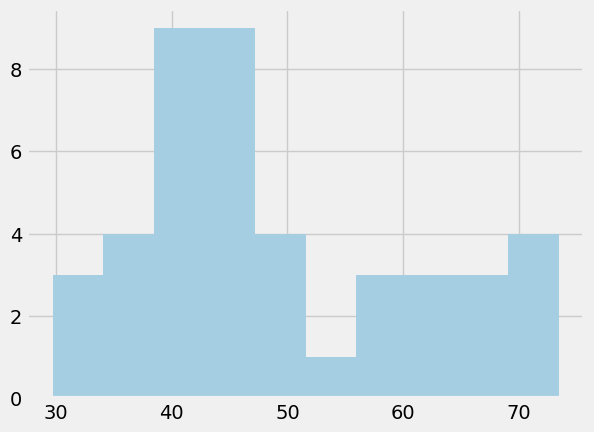

In [274]:
data.loc [error_cut_off_index ] ["winpercent"].hist ()

<Axes: >

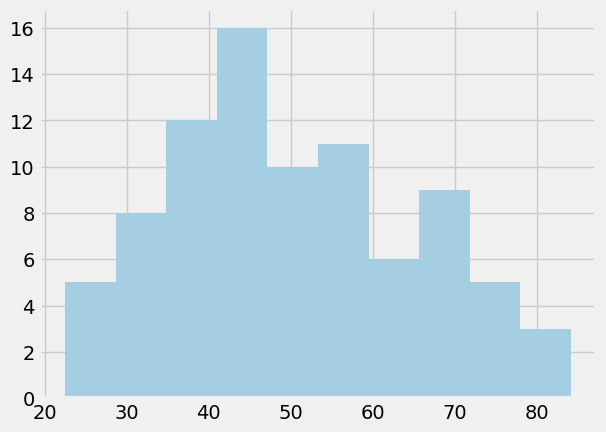

In [275]:
data["winpercent"].hist ()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='winpercent', ylabel='y_pred'>

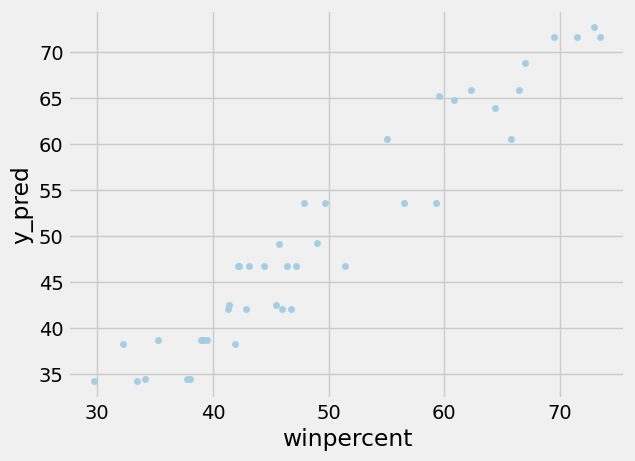

In [276]:
candy_pred.loc [error_cut_off_index ].plot.scatter (y_col,"y_pred")

In [286]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def t_learner(data, treatment_col, outcome_col):
    # Splitting the dataset into treatment and control groups
    treatment_data = data[data[treatment_col] == 1]
    control_data = data[data[treatment_col] == 0]

    X_treatment = treatment_data.drop([treatment_col, outcome_col], axis=1)
    y_treatment = treatment_data[outcome_col]

    X_control = control_data.drop([treatment_col, outcome_col], axis=1)
    y_control = control_data[outcome_col]

    # Define models for treatment and control (using RandomForest for example)
    model_treatment = RandomForestRegressor(**ate_best_params )
    model_control = RandomForestRegressor(**ate_best_params )

    # Train both models
    model_treatment.fit(X_treatment, y_treatment)
    model_control.fit(X_control, y_control)

    # Predict outcomes for the whole dataset with both models
    data_without_treatment_outcome = data.drop([treatment_col, outcome_col], axis=1)
    pred_treatment = model_treatment.predict(data_without_treatment_outcome)
    pred_control = model_control.predict(data_without_treatment_outcome)

    # Calculate ATE as the average difference between predicted outcomes
    ate = np.mean(pred_treatment - pred_control)

    return ate

# Usage example
# ate = t_learner(df, 'treatment', 'y')
# print(f"Estimated ATE: {ate}")


In [303]:
import pandas as pd
import statsmodels.api as sm

def estimate_ate_recursive(data, outcome_var):
    """
    Estimate ATE recursively for each variable in the dataset, treating each as a treatment
    and the others as confounders.

    Parameters:
    - data: Pandas DataFrame containing the outcome variable and potential treatments/confounders.
    - outcome_var: The name of the outcome variable (y).

    Returns:
    A dictionary with variable names as keys and their estimated ATEs as values.
    """
    ate_estimates = {}
    variables = [col for col in data.columns if col != outcome_var]

    for treatment_var in variables:
        # Define the treatment and confounders
        confounders = [col for col in variables if col != treatment_var]

        # Prepare the model data
        X = data[confounders]
        data_tv  = data [treatment_var].values
        X.loc[:, treatment_var] = data_tv
        #X = sm.add_constant(X)  # Adds a constant term to the predictors
        y = data[outcome_var]

        # Fit the model
        #model = sm.OLS(y, X).fit()

        # Estimate ATE as the coefficient of the treatment variable
        #ate_estimates[treatment_var] = model.params[treatment_var]
        ate_estimates[treatment_var] = t_learner(data, treatment_var, outcome_var)

    return ate_estimates

# Example usage (assuming `df` is your DataFrame and 'y' is the outcome variable):
# ate_estimates = estimate_ate_recursive(df, 'y')
# print(ate_estimates)


In [289]:
data.loc [error_cut_off_index ]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,rare
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076,0
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556,0
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,0
16,Fun Dip,0,1,0,0,0,0,1,0,0,0.732,0.325,39.185505,0
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348,0
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958,0
20,Haribo Sour Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,51.412430,0
21,Haribo Twin Snakes,0,1,0,0,0,0,0,0,1,0.465,0.465,42.178772,0


In [292]:
X.loc [error_cut_off_index ].corr()

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,rare
chocolate,1.000000,-0.660059,0.258705,0.181848,0.377426,-0.422833,0.648749,-0.302658,0.427491
fruity,-0.660059,1.000000,-0.457776,-0.137292,-0.284950,0.490453,-0.489795,0.119828,-0.322749
caramel,0.258705,-0.457776,1.000000,0.299912,0.228848,-0.192655,0.258045,-0.183513,-0.008295
nougat,0.181848,-0.137292,0.299912,1.000000,-0.049417,-0.096003,0.280306,-0.157935,-0.055972
crispedricewafer,0.377426,-0.284950,0.228848,-0.049417,1.000000,-0.199254,0.581774,-0.327793,0.133595
hard,-0.422833,0.490453,-0.192655,-0.096003,-0.199254,1.000000,-0.342494,-0.118196,-0.225685
bar,0.648749,-0.489795,0.258045,0.280306,0.581774,-0.342494,1.000000,-0.563436,-0.027955
pluribus,-0.302658,0.119828,-0.183513,-0.157935,-0.327793,-0.118196,-0.563436,1.000000,0.064129
rare,0.427491,-0.322749,-0.008295,-0.055972,0.133595,-0.225685,-0.027955,0.064129,1.000000


In [308]:
estimate_ate_recursive(X.join(y).loc [error_cut_off_index ], outcome_var)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 18.973242456675276,
 'fruity': -3.050660171358789,
 'caramel': 2.6066536384762986,
 'nougat': 11.627404435438951,
 'crispedricewafer': 15.288928236515776,
 'hard': -9.786781967038733,
 'bar': 9.808310287135924,
 'pluribus': 1.9756854277238387,
 'rare': 21.800475882129803}

In [312]:
estimate_ate_recursive(X.join(data [outcome_var2]).loc [error_cut_off_index ], outcome_var2)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 0.2789489437928439,
 'fruity': -0.15731438637972212,
 'caramel': 0.1732580131498353,
 'nougat': -0.0302415702006271,
 'crispedricewafer': 0.3485623227467955,
 'hard': -0.14557547262422177,
 'bar': 0.357653827319385,
 'pluribus': 0.010776606828010956,
 'rare': 0.21953123177560843}

In [314]:
estimate_ate_recursive(X.join(data [outcome_var3]).loc [error_cut_off_index ], outcome_var3)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

{'chocolate': 0.04067872780787735,
 'fruity': -0.08274121138514351,
 'caramel': 0.15769921663739134,
 'nougat': 0.21012200864294403,
 'crispedricewafer': -0.01313439355495496,
 'hard': 0.05633772132989457,
 'bar': -0.00824763673466863,
 'pluribus': 0.10071254454278557,
 'rare': 0.18474271204790638}

In [ ]:
from causalml.inference.meta import BaseTRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the T-learner with RandomForest as the base regressor
t_learner = BaseTRegressor(learner=RandomForestRegressor())

# Fit the T-learner model
# X represents covariates, treatment is the treatment variable, and y is the outcome
t_learner.fit(X=data[['pluribus', 'rare']], treatment=data['chocolate'], y=data['winpercent'])

# Estimate the Average Treatment Effect (ATE)
ate = t_learner.estimate_ate(X=data[['pluribus', 'rare']], treatment=data['chocolate'], y=data['winpercent'])

# ate returns a tuple with the ATE estimate and confidence intervals, which can be printed or analyzed further
print(f"Estimated ATE: {ate[0]}")


Estimated ATE: [16.36288686]


In [ ]:
from causalml.inference.meta import BaseTRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define a function to estimate ATE and its confidence interval


# Example usage for 'chocolate'
X = data[['pluribus', 'rare']]
treatment = data['chocolate']
y = data['winpercent']

model = BaseTRegressor(learner=RandomForestRegressor())
model.fit(X=X, treatment=treatment, y=y)
ate, ate_lb, ate_ub = model.estimate_ate(X=X, treatment=treatment, y=y)

print(f"ATE: {ate}, Lower Bound: {ate_lb}, Upper Bound: {ate_ub}")


ATE: [16.21073238], Lower Bound: [11.21983483], Upper Bound: [21.20162993]


In [ ]:
# Predict the outcomes using the model for the treated and control groups
y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

# Combine predictions (this step may vary based on your specific needs and setup)
y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])

# Calculate R^2 and RMSE
r2 = r2_score(y_true_combined, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_true_combined, y_pred_combined))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")


Prediction R^2: 0.13932761128299764, RMSE: 13.570330234198192


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming data, X, treatment, and y are already defined as per your dataset
X         = data[['pluribus', 'rare']]
treatment = data['chocolate']
y         = data['winpercent']

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}


# Setup the Randomized Search with cross-validation for the entire dataset
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=10, random_state=42, n_jobs = -1 , verbose = 40)

# Perform the search on the entire dataset
random_search.fit(X, y)
best_params = random_search.best_params_


y_pred = random_search.predict (X)

# Calculate R^2 and RMSE
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")



# Apply the best hyperparameters to the RandomForestRegressor
optimized_rf = RandomForestRegressor(**best_params)

# Initialize the BaseTRegressor with the optimized RandomForestRegressor
t_learner = BaseTRegressor(learner=optimized_rf)

# Fit the T-learner to the full dataset
t_learner.fit(X=X, treatment=treatment, y=y)

# Estimate the ATE, its lower and upper bounds
ate, ate_lb, ate_ub = t_learner.estimate_ate(X=X, treatment=treatment, y=y)

print(f"ATE: {ate[0]}, Lower Bound: {ate_lb[0]}, Upper Bound: {ate_ub[0]}")


# Prediction performance evaluation would follow the same logic as before
# Predict the outcomes using the model for the treated and control groups
y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

# Combine predictions (this step may vary based on your specific needs and setup)
y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Prediction R^2: 0.11247428885576882, RMSE: 13.780404085613396
ATE: 19.613803535187124, Lower Bound: 14.692287109422132, Upper Bound: 24.535319960952116


In [ ]:
pd.DataFrame (random_search.cv_results_).to_csv ("hyperparams.csv")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming data, X, treatment, and y are already defined as per your dataset
X         = data[['pluribus', 'rare']]
treatment = data['chocolate']
y         = data['pricepercent']

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

# Setup the Randomized Search with cross-validation for the entire dataset
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=10, random_state=42, n_jobs = -1 , verbose = 40)

# Perform the search on the entire dataset
random_search.fit(X, y)
best_params = random_search.best_params_


y_pred = random_search.predict (X)

# Calculate R^2 and RMSE
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")



# Apply the best hyperparameters to the RandomForestRegressor
optimized_rf = RandomForestRegressor(**best_params)

# Initialize the BaseTRegressor with the optimized RandomForestRegressor
t_learner = BaseTRegressor(learner=optimized_rf)

# Fit the T-learner to the full dataset
t_learner.fit(X=X, treatment=treatment, y=y)

# Estimate the ATE, its lower and upper bounds
ate, ate_lb, ate_ub = t_learner.estimate_ate(X=X, treatment=treatment, y=y)

print(f"ATE: {ate[0]}, Lower Bound: {ate_lb[0]}, Upper Bound: {ate_ub[0]}")


# Prediction performance evaluation would follow the same logic as before
# Predict the outcomes using the model for the treated and control groups
y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

# Combine predictions (this step may vary based on your specific needs and setup)
y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])




Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Assuming data, X, treatment, and y are already defined as per your dataset
X         = data[['pluribus', 'rare']]
treatment = data['chocolate']
y         = data['sugarpercent']

# Define the parameter distribution
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

# Setup the Randomized Search with cross-validation for the entire dataset
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=10, random_state=42, n_jobs = -1 , verbose = 40)

# Perform the search on the entire dataset
random_search.fit(X, y)
best_params = random_search.best_params_



y_pred = random_search.predict (X)

# Calculate R^2 and RMSE
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Prediction R^2: {r2}, RMSE: {rmse}")



# Apply the best hyperparameters to the RandomForestRegressor
optimized_rf = RandomForestRegressor(**best_params)

# Initialize the BaseTRegressor with the optimized RandomForestRegressor
t_learner = BaseTRegressor(learner=optimized_rf)

# Fit the T-learner to the full dataset
t_learner.fit(X=X, treatment=treatment, y=y)

# Estimate the ATE, its lower and upper bounds
ate, ate_lb, ate_ub = t_learner.estimate_ate(X=X, treatment=treatment, y=y)

print(f"ATE: {ate[0]}, Lower Bound: {ate_lb[0]}, Upper Bound: {ate_ub[0]}")


# Prediction performance evaluation would follow the same logic as before
# Predict the outcomes using the model for the treated and control groups
y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

# Combine predictions (this step may vary based on your specific needs and setup)
y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
ATE: 0.9675154236256951, Lower Bound: -9.896122199429856, Upper Bound: 11.831153046681246
Prediction R^2: 0.13082566029752463, RMSE: 26.207708419241023


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


for y_col in ["winpercent", "pricepercent" , "sugarpercent"]:
    # Assuming data, X, treatment, and y are already defined as per your dataset
    print ("=="* 50)
    print ("y_col" , y_col)
    X         = data[['chocolate', 'rare']]
    treatment = data['pluribus']
    y         = data[y_col]

    # Define the parameter distribution
    param_dist = {
        "n_estimators": randint(100, 200),
        "max_depth": randint(3, 20),
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 11)
    }

    # Setup the Randomized Search with cross-validation for the entire dataset
    random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=10, random_state=42, n_jobs = -1 , verbose = 40)

    # Perform the search on the entire dataset
    random_search.fit(X, y)
    best_params = random_search.best_params_


    y_pred = random_search.predict (X)

    # Calculate R^2 and RMSE
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"Prediction R^2: {r2}, RMSE: {rmse}")


    # Apply the best hyperparameters to the RandomForestRegressor
    optimized_rf = RandomForestRegressor(**best_params)

    # Initialize the BaseTRegressor with the optimized RandomForestRegressor
    t_learner = BaseTRegressor(learner=optimized_rf)

    # Fit the T-learner to the full dataset
    t_learner.fit(X=X, treatment=treatment, y=y)

    # Estimate the ATE, its lower and upper bounds
    ate, ate_lb, ate_ub = t_learner.estimate_ate(X=X, treatment=treatment, y=y)

    print(f"ATE: {ate[0]}, Lower Bound: {ate_lb[0]}, Upper Bound: {ate_ub[0]}")


    # Prediction performance evaluation would follow the same logic as before
    # Predict the outcomes using the model for the treated and control groups
    y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
    y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

    # Combine predictions (this step may vary based on your specific needs and setup)
    y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
    y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])


    # Calculate R^2 and RMSE
    #r2 = r2_score(y_true_combined, y_pred_combined)
    #rmse = np.sqrt(mean_squared_error(y_true_combined, y_pred_combined))

    #print(f"Prediction R^2: {r2}, RMSE: {rmse}")


y_col winpercent
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
ATE: -0.20628540670977064, Lower Bound: -4.76275411080641, Upper Bound: 4.350183297386868
Prediction R^2: 0.5015396673407027, RMSE: 10.327299748949185
y_col pricepercent
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
ATE: -0.010948428177623397, Lower Bound: -10.029095588421482, Upper Bound: 10.007198732066234
Prediction R^2: 0.3236115603643147, RMSE: 23.361392723457943
y_col sugarpercent
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from causalml.inference.meta import BaseTRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


for y_col in ["winpercent", "pricepercent" , "sugarpercent"]:
    # Assuming data, X, treatment, and y are already defined as per your dataset
    print ("=="* 50)
    print ("y_col" , y_col)
    X         = data[['chocolate' , 'pluribus']]
    treatment = data['rare']
    y         = data[y_col]

    # Define the parameter distribution
    param_dist = {
        "n_estimators": randint(100, 200),
        "max_depth": randint(3, 20),
        "min_samples_split": randint(2, 11),
        "min_samples_leaf": randint(1, 11)
    }

    # Setup the Randomized Search with cross-validation for the entire dataset
    random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=10, random_state=42, n_jobs = -1 , verbose = 40)

    # Perform the search on the entire dataset
    random_search.fit(X, y)
    best_params = random_search.best_params_

    # Apply the best hyperparameters to the RandomForestRegressor
    optimized_rf = RandomForestRegressor(**best_params)

    # Initialize the BaseTRegressor with the optimized RandomForestRegressor
    t_learner = BaseTRegressor(learner=optimized_rf)

    # Fit the T-learner to the full dataset
    t_learner.fit(X=X, treatment=treatment, y=y)

    # Estimate the ATE, its lower and upper bounds
    ate, ate_lb, ate_ub = t_learner.estimate_ate(X=X, treatment=treatment, y=y)

    print(f"ATE: {ate[0]}, Lower Bound: {ate_lb[0]}, Upper Bound: {ate_ub[0]}")


    # Prediction performance evaluation would follow the same logic as before
    # Predict the outcomes using the model for the treated and control groups
    y_pred_treated = model.model_t.fit (X,y).predict(X[treatment == 1])
    y_pred_control = model.model_c.fit (X,y).predict(X[treatment == 0])

    # Combine predictions (this step may vary based on your specific needs and setup)
    y_pred_combined = np.concatenate([y_pred_treated, y_pred_control])
    y_true_combined = np.concatenate([y[treatment == 1], y[treatment == 0]])

    # Calculate R^2 and RMSE
    r2 = r2_score(y_true_combined, y_pred_combined)
    rmse = np.sqrt(mean_squared_error(y_true_combined, y_pred_combined))

    print(f"Prediction R^2: {r2}, RMSE: {rmse}")
